In [3]:
#load google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [5]:
X_train = pd.read_csv("dengue_features_train.csv")

In [6]:
X_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
X_train.shape

(1456, 24)

In [8]:
X_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [10]:
X_train['station_max_temp_c'].head()

0    29.4
1    31.7
2    32.2
3    33.3
4    35.0
Name: station_max_temp_c, dtype: float64

In [11]:
X_train['station_min_temp_c'].head()

0    20.0
1    22.2
2    22.8
3    23.3
4    23.9
Name: station_min_temp_c, dtype: float64

In [12]:
X_train['station_avg_temp_c'].head()

0    25.442857
1    26.714286
2    26.714286
3    27.471429
4    28.942857
Name: station_avg_temp_c, dtype: float64

In [13]:
0.5 * (X_train['station_max_temp_c'] + X_train['station_min_temp_c'])

0       24.70
1       26.95
2       27.50
3       28.30
4       29.45
        ...  
1451    28.90
1452    28.20
1453    25.70
1454    26.10
1455    27.95
Length: 1456, dtype: float64

In [14]:
X_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [15]:
X_test = pd.read_csv("dengue_features_test.csv")

In [16]:
X_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [17]:
X_test.shape

(416, 24)

In [18]:
(X_test.columns == X_train.columns).all()

True

In [ ]:
#look data quality issues (e.g, missing values)
#Get a feel of features that are strongly related to labels
#think about feature engineering capabilities
#Identify the different data types present
#Think about simple models to serve as benchmarks!!!

In [ ]:
#mostly numerical data but do have nominal data -->('city') and some datetime columns
#very few missing data

In [19]:
y_train = pd.read_csv("dengue_labels_train.csv")

In [20]:
y_train.head(20)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [21]:
df = X_train.merge(y_train, on=['city', 'year', 'weekofyear'])

In [22]:
df.groupby('city')['total_cases'].mean()

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [ ]:
#Simple models
#Use the average for each city

In [23]:
df.corr()['total_cases']

year                                    -0.306806
weekofyear                               0.216452
ndvi_ne                                 -0.241376
ndvi_nw                                 -0.202235
ndvi_se                                 -0.168612
ndvi_sw                                 -0.196461
precipitation_amt_mm                    -0.038740
reanalysis_air_temp_k                    0.264952
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_max_air_temp_k               -0.191345
reanalysis_min_air_temp_k                0.325252
reanalysis_precip_amt_kg_per_m2         -0.010031
reanalysis_relative_humidity_percent    -0.132452
reanalysis_sat_precip_amt_mm            -0.038740
reanalysis_specific_humidity_g_per_kg    0.129861
reanalysis_tdtr_k                       -0.278483
station_avg_temp_c                       0.116109
station_diur_temp_rng_c                 -0.237844
station_max_temp_c                      -0.039219


In [25]:
df.corr()['total_cases'].sort_values(key=lambda x: abs(x), ascending=False)

total_cases                              1.000000
reanalysis_min_air_temp_k                0.325252
year                                    -0.306806
reanalysis_tdtr_k                       -0.278483
station_min_temp_c                       0.267109
reanalysis_air_temp_k                    0.264952
ndvi_ne                                 -0.241376
station_diur_temp_rng_c                 -0.237844
weekofyear                               0.216452
ndvi_nw                                 -0.202235
ndvi_sw                                 -0.196461
reanalysis_max_air_temp_k               -0.191345
ndvi_se                                 -0.168612
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_relative_humidity_percent    -0.132452
reanalysis_specific_humidity_g_per_kg    0.129861
station_avg_temp_c                       0.116109
station_precip_mm                       -0.074374
station_max_temp_c                      -0.039219


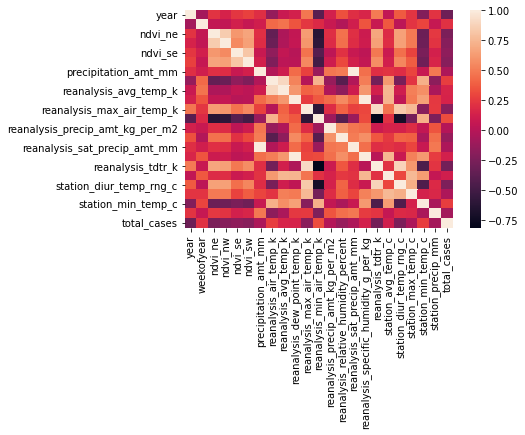

In [31]:
sns.heatmap(df.corr())

In [ ]:
# Maybe we can look at how much precipation is leading case loads

In [37]:
cases_sj = (  
    df
    .query("city == 'sj'")
    .assign(date=lambda df: pd
    .to_datetime(df['week_start_date']))
    .set_index("date")
)

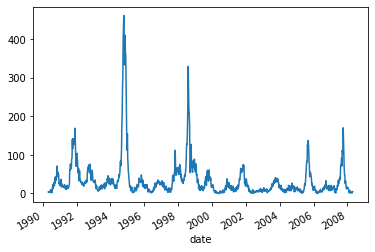

In [41]:
cases_sj.loc[:, 'total_cases'].plot()

In [ ]:
#I want to show total cases per year as a function of total precipation

In [63]:
results = cases_sj.resample("Y").agg({"total_cases": "sum","precipitation_amt_mm" : "sum" })[["total_cases","precipitation_amt_mm"]].values

In [67]:
results[:5]

array([[ 866.  , 1513.63],
       [2801.  , 1277.46],
       [2371.  , 2156.64],
       [1156.  , 1551.87],
       [6533.  , 1031.74]])

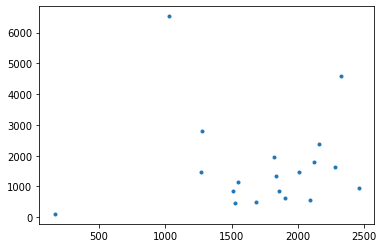

In [71]:
plt.plot(results[: ,1], results[:, 0], '.')

In [72]:
np.corrcoef(results[:, 1], results[:, 0])

array([[ 1.00000000e+00, -7.79598209e-04],
       [-7.79598209e-04,  1.00000000e+00]])

In [ ]:
#precipation might be a leading indicator
#might need to do some feature engineering here

In [ ]:
#How far back is precipation correlated with total cases?

In [80]:
results = cases_sj.resample("Y").agg({"total_cases": "sum","precipitation_amt_mm" : "sum" })
results

,total_cases,precipitation_amt_mm
date,,
1990-12-31,866,1513.63
1991-12-31,2801,1277.46
1992-12-31,2371,2156.64
1993-12-31,1156,1551.87
1994-12-31,6533,1031.74
1995-12-31,1333,1838.12
1996-12-31,855,1854.43
1997-12-31,1454,1267.61
1998-12-31,4595,2322.73


In [83]:
results.shift(-1)

,total_cases,precipitation_amt_mm
date,,
1990-12-31,2801.0,1277.46
1991-12-31,2371.0,2156.64
1992-12-31,1156.0,1551.87
1993-12-31,6533.0,1031.74
1994-12-31,1333.0,1838.12
1995-12-31,855.0,1854.43
1996-12-31,1454.0,1267.61
1997-12-31,4595.0,2322.73
1998-12-31,1633.0,2282.71


In [ ]:
# Create a data frame with date, total cases, and precipation amount
# Shift back by a unit and calculate the correlation
# Repeat for various shifts and plot the correlation

In [ ]:
# cases_sj = (  
#     df
#     .query("city == 'sj'")
#     .assign(date=lambda df: pd
#     .to_datetime(df['week_start_date']))
#     .set_index("date")
# )